# ISTA 322 Homework 1

Welcome to your first homework!  This one is focused on just practicing some of the exercises covered in the last coding lesson.  There are also some more open-ended questions with elements that I didn't demonstrate in that lesson... they're structurally similar, but you might need to google a thing or two to figure out the correction function.  

You need to add your own code blocks to answer any of the coding questions.  Also, at the end of some sections I have a 'questions' section.  Add a text cell right below and enter your answers. 

## Loading and Importing

First thing you need to do is load up your packages and then bring in the data.  

This dataset contains daily values for Amazon's stock.  This includes opening, closing, high price, low price, and also the amount of stock traded. 

In [1]:
import pandas as pd
# also import matplotlib.pyplot and numpy with the proper aliases
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Bring in your data. You just need to run this cell.
price = pd.read_csv("https://docs.google.com/spreadsheets/d/1z6br9DCz3v9MmPSBfGm7zy9-B-JQuKk71uh9SM0-NPw/gviz/tq?tqx=out:csv")

## Exploring the whole dataset

Now make some code cells to explore the whole dataset.  I want you to do the following:

- Get the number of rows and columns
- Get the datatypes of each column
- Look at the first five rows
- Look at the last five rows
- Look at summary statistics

In [3]:
#Number of Rows in Dataframe
len(price)

5852

In [4]:
#Number of Columns in Dataframe
len(price.columns)

7

In [5]:
#First five rows
price.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [6]:
#Last Five Rows
price.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
5847,2020-08-10,3170.310059,3172.510010,3101.520020,3148.159912,3148.159912,3167300
5848,2020-08-11,3113.199951,3159.219971,3073.000000,3080.669922,3080.669922,3718100
5849,2020-08-12,3108.000000,3174.389893,3101.419922,3162.239990,3162.239990,3527200
5850,2020-08-13,3182.989990,3217.520020,3155.000000,3161.020020,3161.020020,3149000
5851,2020-08-14,3178.179932,3178.239990,3120.000000,3148.020020,3148.020020,2749200


In [7]:
price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5.852000e+03
mean,377.469557,381.737827,372.815253,377.500736,377.500736,7.512673e+06
std,596.291033,602.615299,589.226694,596.287464,596.287464,7.278144e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.995000,38.590000,37.247501,37.950001,37.950001,3.681975e+06
50%,83.699997,85.029999,82.055000,83.602501,83.602501,5.652850e+06
75%,360.852501,365.794991,357.877510,362.217506,362.217506,8.517450e+06
max,3251.060059,3344.290039,3165.429932,3225.000000,3225.000000,1.043292e+08


### Questions

- How many rows are in this dataset?
- Do any datatypes need to be converted?
- What was the mean and all time high opening stock price?

In [8]:
#There are 5852 rows in the dataset

In [9]:
price.dtypes
#Yes the date column needs to be changed to datetime type.

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
#The mean opening stock price
sum(price['Open'])/len(price['Open'])

377.4695570299043

In [11]:
#All Time High Opening Stock Price
max(price['Open'])

3251.060059

## Making some columns

Here we need to make a couple new columns.

- First, turn that date column into an actual date object.  
- Also make a new column called 'up_binom' if the stock price increased for that day

In [12]:
price['Date'] = pd.to_datetime(price['Date'])

In [13]:
price['up_binom'] = np.where(price['Close'] > price['Open'],1,0)

### Using the columns - Making a plot

Let's use those columns we just made to make a plot

- First, explore your new column.  What is the starting date, ending date, and total time from beginning to end?  You'll need three lines of code to do this
- Next, make a plot of the closing price over the whole timeframe of the dataset
- Hint - you might need to google how to make a line plot!

In [14]:
#The first five values of up_binom
price['up_binom'].head()

0    0
1    0
2    0
3    0
4    0
Name: up_binom, dtype: int32

In [15]:
#The last five columns of up_binom
price['up_binom'].tail()

5847    0
5848    0
5849    1
5850    0
5851    0
Name: up_binom, dtype: int32

In [16]:
#Length of up_binom 
len(price['up_binom'])

5852

In [17]:
#First Date
price.iloc[0,0]

Timestamp('1997-05-15 00:00:00')

In [18]:
#Last Date
price.iloc[-1,0]

Timestamp('2020-08-14 00:00:00')

In [19]:
#Total time from beginning to end
price.iloc[-1,0] - price.iloc[0,0]

Timedelta('8492 days 00:00:00')

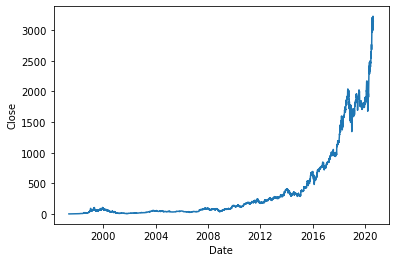

In [20]:
#Lineplot of Closing Price by Date
sns.lineplot(x="Date",y="Close",data=price)

### Using the columns - How rich could I be?  

Word problem time.  When I was 13 I save up $2000 from mowing lawns and bought a bicycle.  This was honestly right around the start of this dataset (May 15, 1997).  Let's say instead of buying that bike I put all that money into Amazon stock.  How much would that stock be worth on the very last day of this dataset?





In [21]:
# I'm going to make your life easier and set the date column you created as the index.
# This will make searching and extracting the values much easier
price = price.set_index('Date')

In [22]:
valuation_change = (2000 / price.iloc[0,0]) * price.iloc[-1,3]

In [23]:
valuation_change

2582990.7856410258

###Questions

How big of a mistake did I make in dollars by not buying Amazon stock?

In [24]:
#The mistake can be calculated as follows:-
mistake = valuation_change - 2000

In [25]:
mistake
#Amt in dollars

2580990.7856410258

## JSON

The last part of the assignment will have you working with some basic JSON data.  The URL links to a JSON file with stats on every episode of the TV show Silicon Valley


In [30]:
# First just run this to import the data
import requests
url = 'http://api.tvmaze.com/singlesearch/shows?q=silicon-valley&embed=episodes'
sv_json_obj = requests.get(url)
sv_json = sv_json_obj.json()

### Viewing your JSON

Now just to look at what's in the JSON a bit

- Make a code cell that just calls the JSON we named above. 
- Also run the .keys() function on the object.

In [31]:
sv_json

{'id': 143,
 'url': 'http://www.tvmaze.com/shows/143/silicon-valley',
 'name': 'Silicon Valley',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Comedy'],
 'status': 'Ended',
 'runtime': 30,
 'premiered': '2014-04-06',
 'officialSite': 'http://www.hbo.com/silicon-valley/',
 'schedule': {'time': '22:00', 'days': ['Sunday']},
 'rating': {'average': 8.5},
 'weight': 90,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'}},
 'webChannel': None,
 'externals': {'tvrage': 33759, 'thetvdb': 277165, 'imdb': 'tt2575988'},
 'image': {'medium': 'http://static.tvmaze.com/uploads/images/medium_portrait/215/538434.jpg',
  'original': 'http://static.tvmaze.com/uploads/images/original_untouched/215/538434.jpg'},
 'summary': '<p>In the high-tech gold rush of modern Silicon Valley, the people most qualified to succeed are the least capable of handling success. From Mike Judge comes this satire about a programmer whose

In [32]:
sv_json.keys()

dict_keys(['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime', 'premiered', 'officialSite', 'schedule', 'rating', 'weight', 'network', 'webChannel', 'externals', 'image', 'summary', 'updated', '_links', '_embedded'])

### Questions

Based on these responses, what keys are present in the JSON.  More importantly, are there any keys that don't get returned by .keys()?

In [33]:
l = []
for i in sv_json:
    l.append(i)
print(l == list(sv_json.keys()))

True


In [34]:
#The keys present in JSON are
print(l)

['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime', 'premiered', 'officialSite', 'schedule', 'rating', 'weight', 'network', 'webChannel', 'externals', 'image', 'summary', 'updated', '_links', '_embedded']


In [35]:
#There are no such keys that are not returned by sv_json.keys()

### Looking at overall show info

They keys it's returning are related to the overall show info.  Can you do the following? 

- Get the day the show premiered
- Get the summary of the show
- Get the name of the network the show aired on 

In [36]:
#The day the show was premiered
sv_json['premiered']

'2014-04-06'

In [37]:
sv_json['summary']

'<p>In the high-tech gold rush of modern Silicon Valley, the people most qualified to succeed are the least capable of handling success. From Mike Judge comes this satire about a programmer whose game-changing algorithm becomes the subject of a valley-wide bidding war.</p>'

In [38]:
sv_json['network']

{'id': 8,
 'name': 'HBO',
 'country': {'name': 'United States',
  'code': 'US',
  'timezone': 'America/New_York'}}

### Info from individual episodes

To wrap up I want you to pull just some info from individual episodes. To access them we can use the '_embedded' key first.  Please do the following

- Get the title of the 7th episode entry from the start
- Get the summary of the 3rd episode entry from the start
- Get the original image URL from the 4 entry from the start

In [39]:
# First, you can see the structure after moving down a level into '_embedded'
sv_json['_embedded']

{'episodes': [{'id': 10897,
   'url': 'http://www.tvmaze.com/episodes/10897/silicon-valley-1x01-minimum-viable-product',
   'name': 'Minimum Viable Product',
   'season': 1,
   'number': 1,
   'airdate': '2014-04-06',
   'airtime': '22:00',
   'airstamp': '2014-04-07T02:00:00+00:00',
   'runtime': 30,
   'image': {'medium': 'http://static.tvmaze.com/uploads/images/medium_landscape/49/123633.jpg',
    'original': 'http://static.tvmaze.com/uploads/images/original_untouched/49/123633.jpg'},
   'summary': "<p>Attending an elaborate launch party, Richard and his computer programmer friends - Big Head, Dinesh and Gilfoyle - dream of making it big. Instead, they're living in the communal Hacker Hostel owned by former programmer Erlich, who gets to claim ten percent of anything they invent there. When it becomes clear that Richard has developed a powerful compression algorithm for his website, Pied Piper, he finds himself courted by Gavin Belson, his egomaniacal corporate boss, who offers a $1

In [43]:
sv_json['_embedded']['episodes'][6]['name']

'Proof of Concept'

In [45]:
sv_json['_embedded']['episodes'][2]['summary']

'<p>While Gavin Belson begins to hype Nucleus, a competing compression platform, Richard learns that the name Pied Piper is already registered to a sprinkler company, forcing him to negotiate. Meanwhile, Erlich goes on a vision quest for a new company name, and Peter Gregory proves elusive when one of his companies asks for money.</p>'

In [49]:
sv_json['_embedded']['episodes'][3]['image']['original']

'http://static.tvmaze.com/uploads/images/original_untouched/49/123636.jpg'